In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [2]:
df=pd.read_csv("movies.csv")

## Data Inspection

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Data Cleaning

In [6]:
for i in df.columns:
    pct_missing=np.mean(df[i].isnull())
    print("{} : {}%".format(i,round(pct_missing*100)))

name : 0%
rating : 1%
genre : 0%
year : 0%
released : 0%
score : 0%
votes : 0%
director : 0%
writer : 0%
star : 0%
country : 0%
budget : 28%
gross : 2%
company : 0%
runtime : 0%


Columns 'rating','budget' & 'gross' have null values which need to be dealt with. Since 'rating' is discrete datatype, its null values will be imputed with its mode, whereas 'gross' & 'budget' have to be checked for outliers as null values of continuous data having outliers is replaced with median and mean is imputed in case of no outliers.

### Imputing Mode

In [7]:
rating_mode = df['rating'].mode()[0]

In [8]:
df['rating'].fillna(rating_mode, inplace=True)

In [9]:
df['rating'].isnull().sum()

0

Mode Imputation for categorical data (rating) is done 

### Checking for Outliers

<AxesSubplot:>

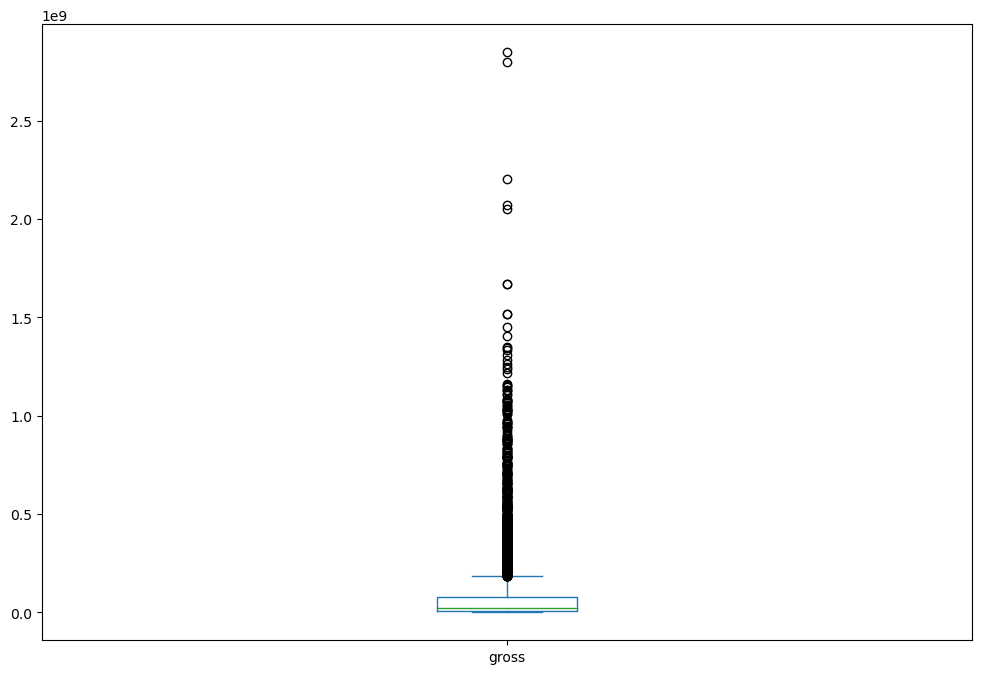

In [10]:
df['gross'].plot(kind='box')

The 'gross' dataseries contains a lot of outliers, so it will be imputed with its median

In [11]:
gross_median = df['gross'].median()


df['gross'].fillna(gross_median, inplace=True)

In [12]:
df['gross'].isnull().sum()

0

<AxesSubplot:ylabel='budget'>

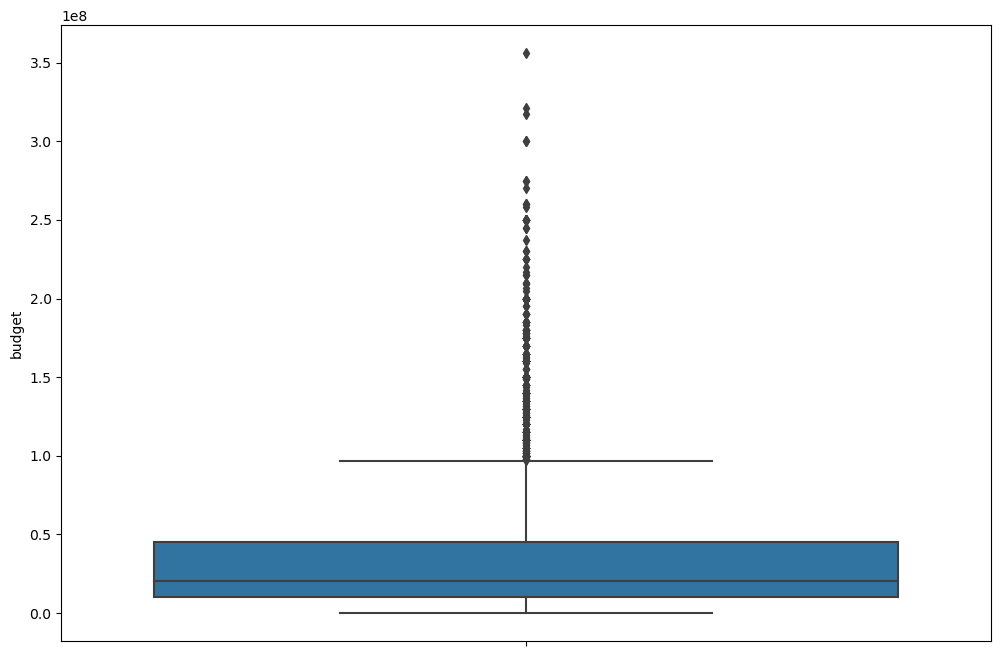

In [13]:
sns.boxplot(data=df, y='budget')

The dataseries 'budget' also has outliers, so we will impute the null values with its median

In [14]:
budget_median = df['budget'].median()


df['budget'].fillna(budget_median, inplace=True)

In [15]:
df['budget'].isnull().sum()

0

Both the continuous data series have been imputed with their respective medians

In [16]:
for i in df.columns:
    pct_missing=np.mean(df[i].isnull())
    print("{} : {}%".format(i,round(pct_missing*100)))

name : 0%
rating : 0%
genre : 0%
year : 0%
released : 0%
score : 0%
votes : 0%
director : 0%
writer : 0%
star : 0%
country : 0%
budget : 0%
gross : 0%
company : 0%
runtime : 0%


The dataset now does not contain any null values

### Changing data types of columns from float to int

In [17]:
df['budget']=df['budget'].astype('int64')

df['gross']=df['gross'].astype('int64')

In [18]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [32]:
df.sort_values(by='gross', ascending = False, inplace=True)

In [33]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [35]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


Now the dataset has been cleaned and has no null or duplicate values

## Correlation

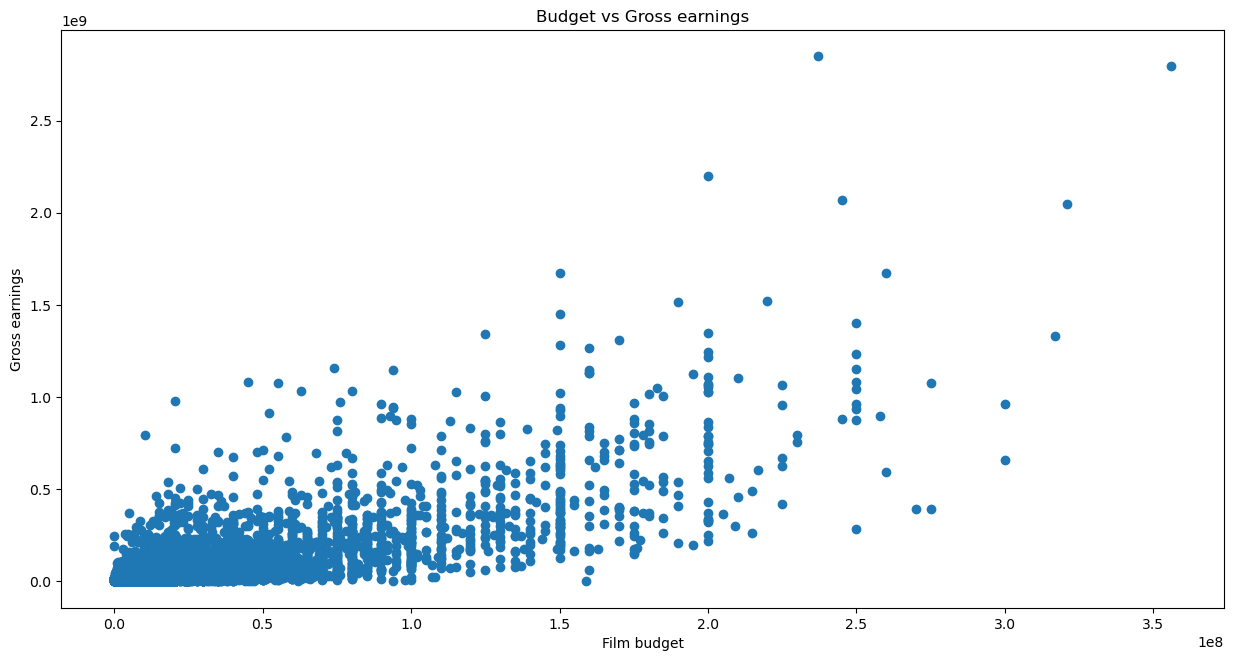

In [72]:
plt.figure(figsize=(15,7.5))

plt.scatter(x=df['budget'], y=df['gross']) 

plt.title('Budget vs Gross earnings')
plt.ylabel('Gross earnings')
plt.xlabel('Film budget')

plt.show()

Text(0, 0.5, 'Gross')

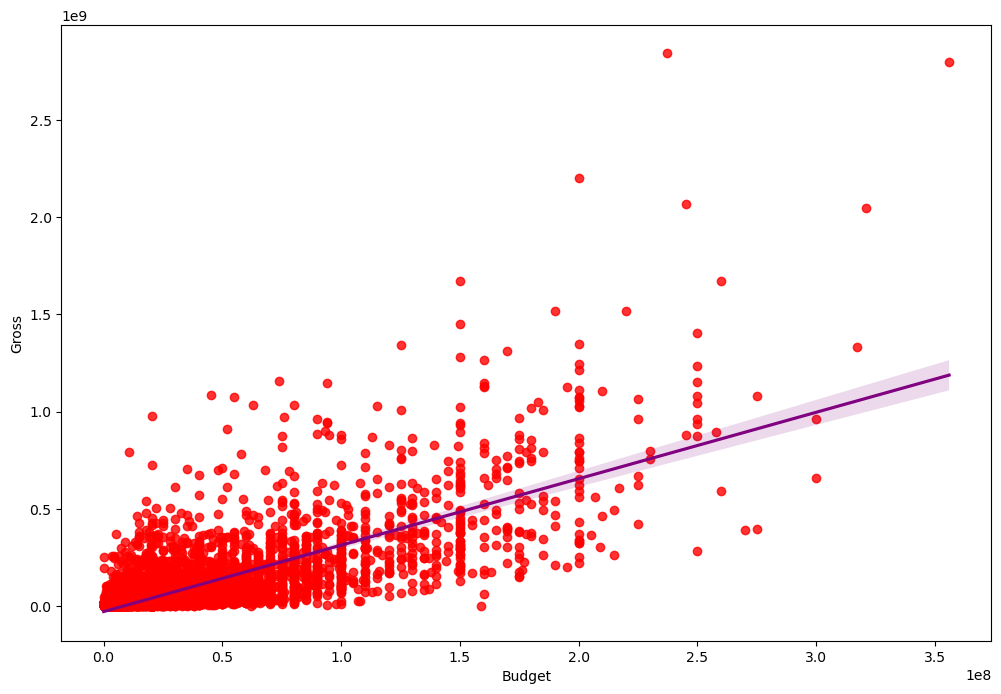

In [74]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'purple'})

plt.xlabel('Budget')
plt.ylabel('Gross')

### Different Correlation Matrices

In [75]:
df.corr(method="pearson")

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.291690,0.259504,0.120811
score,0.097995,1.000000,0.409182,0.061979,0.185583,0.399451
votes,0.222945,0.409182,1.000000,0.460932,0.632103,0.309212
budget,0.291690,0.061979,0.460932,1.000000,0.745881,0.273363
gross,0.259504,0.185583,0.632103,0.745881,1.000000,0.244360
runtime,0.120811,0.399451,0.309212,0.273363,0.244360,1.000000


In [76]:
df.corr(method="kendall")

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.185818,0.196205,0.097184
score,0.067652,1.000000,0.300115,-0.001745,0.084542,0.283611
votes,0.331465,0.300115,1.000000,0.269162,0.530016,0.198240
budget,0.185818,-0.001745,0.269162,1.000000,0.376115,0.192073
gross,0.196205,0.084542,0.530016,0.376115,1.000000,0.165127
runtime,0.097184,0.283611,0.198240,0.192073,0.165127,1.000000


In [77]:
df.corr(method="spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.258703,0.287788,0.142977
score,0.099045,1.000000,0.428138,-0.002880,0.124016,0.399857
votes,0.469829,0.428138,1.000000,0.382129,0.722491,0.290159
budget,0.258703,-0.002880,0.382129,1.000000,0.520018,0.270496
gross,0.287788,0.124016,0.722491,0.520018,1.000000,0.241439
runtime,0.142977,0.399857,0.290159,0.270496,0.241439,1.000000


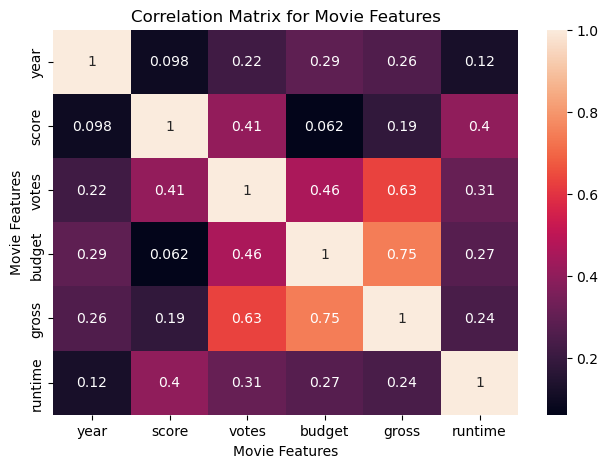

In [87]:
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(7.5,5))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Movie Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [105]:
df_numerized = df

for i in df_numerized.columns:
    if (df_numerized[i].dtype == 'object'):
        df_numerized[i] = df_numerized[i].astype('category')
        df_numerized[i] = df_numerized[i].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,20500000,1400,477,103.0
7625,6720,6,4,2019,1149,5.7,320.0,2546,2565,1915,55,20500000,790,2308,104.0
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,20500000,682,1992,93.0
2417,3406,6,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000,596,796,134.0


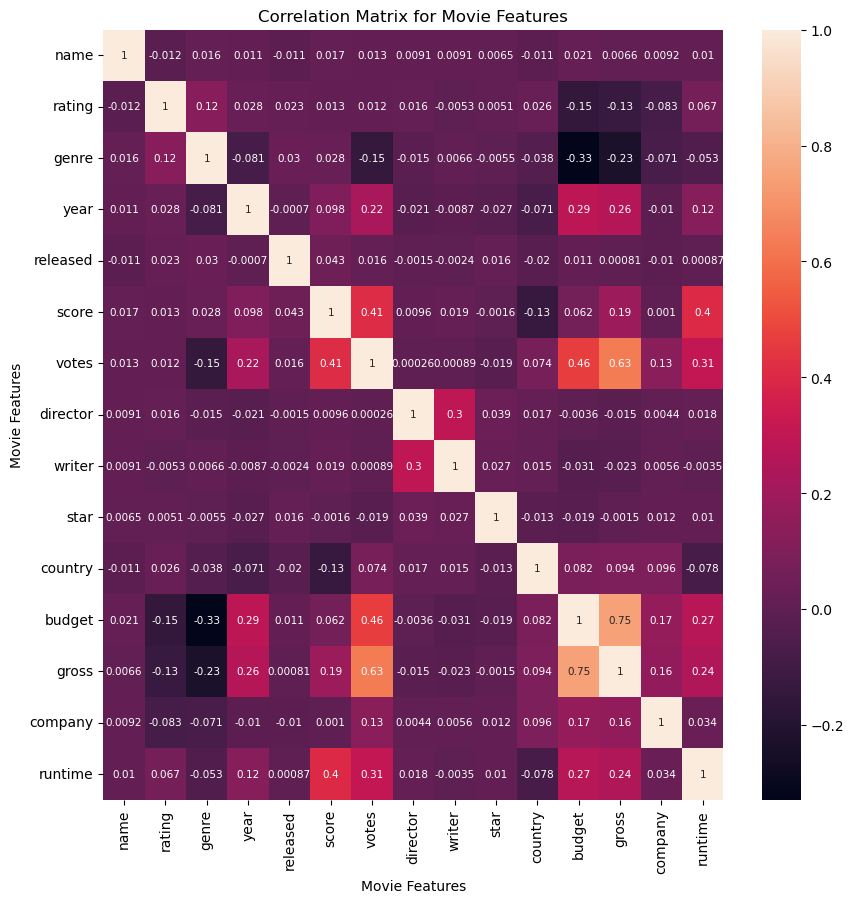

In [117]:
correlation_matrix = df_numerized.corr(method='pearson')

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, annot_kws={'size':7.5})
plt.title('Correlation Matrix for Movie Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

### Unstacking the Matrix

In [118]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name     name        1.000000
         rating     -0.012441
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.273363
         gross       0.244360
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [119]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre    budget    -0.328484
budget   genre     -0.328484
genre    gross     -0.233385
gross    genre     -0.233385
budget   rating    -0.148543
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [120]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.632103
votes     gross       0.632103
gross     budget      0.745881
budget    gross       0.745881
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Out of the dataset, Votes and Budget have the highest correlation to gross earnings

Company does not have any significant correlation with neither Budget nor Gross which was initially expected